In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data loading
import pandas as pd
import statsmodels
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import numpy as np
from plotnine import *
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import sklearn.cluster
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [ ]:
EDA_file = pd.read_csv("/content/drive/MyDrive/Springboard/outputfilename.csv")
EDA_file = EDA_file.drop(columns=['state_fips_code', 'res_county','county_fips_code','ethnicity','case_positive_specimen_interval','case_onset_interval'])
EDA_file=EDA_file.loc[(EDA_file['death_yn'].isin(['Yes','No'])) & (EDA_file['age_group'].isin(['18 to 49 years','50 to 64 years','65+ years','0 - 17 years'])) & EDA_file['sex'].isin(['Female','Male']) & 
                                  EDA_file['race'].isin(['White','Black','Asian','American Indian/Alaska Native','Native Hawaiian/Other Pacific Islander','Multiple/Other','Unknown'])
                                  & (~EDA_file['process'].isin(['Other'])) & (~EDA_file['underlying_conditions_yn'].isnull())]
#EDA_file.head()
df = EDA_file.groupby(['case_month','res_state','sex','race','process','exposure_yn','symptom_status','hosp_yn','current_status','age_group','underlying_conditions_yn','icu_yn'])['death_yn'].agg(['count']).reset_index()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.res_state.nunique()
df_state_array = df['res_state'].unique()

df_state = pd.DataFrame(df_state_array, columns = ['res_state'])

#print(df)
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_age3 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06'])),
                    ['case_month','res_state','age_group','count']]
df_age6 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06','2021-05','2021-04','2021-03'])),
                    ['case_month','res_state','age_group','count']]
df_age9 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06','2021-05','2021-04','2021-03','2021-02','2021-01','2020-12'])),
                    ['case_month','res_state','age_group','count']]
df_age12 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06','2021-05','2021-04','2021-03','2021-02','2021-01','2020-12','2020-11','2020-10','2020-09'])),
                    ['case_month','res_state','age_group','count']]
df_age9.res_state.nunique()

41

In [ ]:
result1 = df_age3.groupby(['res_state','age_group'])['count'].agg(['mean', 'min', 'max']).reset_index()

result1.rename(columns={'mean': 'age_mean3', 'min': 'age_min3','max':'age_max3'}, inplace=True)
result1_p = result1.pivot(index='res_state', columns='age_group', values=['age_mean3', 'age_max3']).reset_index()
result1_p.columns = ['_'.join(col) for col in result1_p.columns.values]
result1_p.rename(columns={'res_state_': 'res_state'}, inplace=True)
result1_p.res_state.nunique()
#result1

32

In [ ]:
result1.head()

,res_state,age_group,age_mean3,age_min3,age_max3
0,AK,18 to 49 years,1.000000,1,1
1,AL,18 to 49 years,3.545455,1,12
2,AL,50 to 64 years,1.000000,1,1
3,AR,65+ years,2.166667,1,4
4,AZ,18 to 49 years,6.076923,1,66


In [ ]:
result2 = df_age6.groupby(['res_state','age_group'])['count'].agg(['mean', 'min', 'max']).reset_index()
result2.rename(columns={'mean': 'age_mean6', 'min': 'age_min6','max':'age_max6'}, inplace=True)
result2_p = result2.pivot(index='res_state', columns='age_group', values=['age_mean6', 'age_max6']).reset_index()
result2_p.columns = ['_'.join(col) for col in result2_p.columns.values]
result2_p.rename(columns={'res_state_': 'res_state'}, inplace=True)
result2_p.head()
#result2

,res_state,age_mean6_0 - 17 years,age_mean6_18 to 49 years,age_mean6_50 to 64 years,age_mean6_65+ years,age_max6_0 - 17 years,age_max6_18 to 49 years,age_max6_50 to 64 years,age_max6_65+ years
0,AK,1.000000,1.111111,1.200000,NaN,1.0,2.0,2.0,NaN
1,AL,NaN,3.000000,1.000000,NaN,NaN,12.0,1.0,NaN
2,AR,NaN,NaN,NaN,2.166667,NaN,NaN,NaN,4.0
3,AZ,2.000000,4.923077,1.285714,1.000000,2.0,66.0,2.0,1.0
4,CA,1.208333,5.407524,1.363636,2.166667,3.0,159.0,3.0,7.0


In [ ]:
result3 = df_age9.groupby(['res_state','age_group'])['count'].agg(['mean', 'min', 'max']).reset_index()
result3.rename(columns={'mean': 'age_mean9', 'min': 'age_min9','max':'age_max9'}, inplace=True)
result3_p = result3.pivot(index='res_state', columns='age_group', values=['age_mean9', 'age_max9']).reset_index()
result3_p.columns = ['_'.join(col) for col in result3_p.columns.values]
result3_p.rename(columns={'res_state_': 'res_state'}, inplace=True)
result3_p.head()

,res_state,age_mean9_0 - 17 years,age_mean9_18 to 49 years,age_mean9_50 to 64 years,age_mean9_65+ years,age_max9_0 - 17 years,age_max9_18 to 49 years,age_max9_50 to 64 years,age_max9_65+ years
0,AK,1.000000,1.285714,1.300000,1.444444,1.0,4.0,3.0,3.0
1,AL,1.000000,5.468085,1.000000,1.000000,1.0,48.0,1.0,1.0
2,AR,162.693878,261.418605,146.612903,94.609375,1477.0,5365.0,2245.0,1497.0
3,AZ,2.571429,13.053030,3.523810,3.307692,7.0,462.0,29.0,11.0
4,CA,1.625000,10.004967,2.410256,1.967742,9.0,425.0,25.0,8.0


In [ ]:
result4 = df_age12.groupby(['res_state','age_group'])['count'].agg(['mean', 'min', 'max']).reset_index()
result4.rename(columns={'mean': 'age_mean12', 'min': 'age_min12','max':'age_max12'}, inplace=True)
result4_p = result4.pivot(index='res_state', columns='age_group', values=['age_mean12', 'age_max12']).reset_index()
result4_p.columns
result4_p.columns = ['_'.join(col) for col in result4_p.columns.values]
result4_p.rename(columns={'res_state_': 'res_state'}, inplace=True)
result4_p.head()



,res_state,age_mean12_0 - 17 years,age_mean12_18 to 49 years,age_mean12_50 to 64 years,age_mean12_65+ years,age_max12_0 - 17 years,age_max12_18 to 49 years,age_max12_50 to 64 years,age_max12_65+ years
0,AK,1.153846,1.697183,1.312500,1.400000,2.0,12.0,3.0,3.0
1,AL,1.000000,5.753247,1.000000,1.000000,1.0,51.0,1.0,1.0
2,AR,134.385417,236.011494,134.600000,94.442623,1477.0,5365.0,2245.0,1497.0
3,AZ,1.928571,12.339181,3.034483,3.187500,7.0,462.0,29.0,11.0
4,CA,1.597222,10.343902,2.508772,1.925000,9.0,425.0,25.0,8.0


In [ ]:
df_final_age = df_state.merge(result1_p,on = ['res_state'],how = 'left').merge(result2_p,on = ['res_state'],how = 'left').merge(result3_p,on = ['res_state'],how = 'left').merge(result4_p,on =['res_state'],how = 'left')
#df_final_age = pd.concat([result1, result2,result3], axis=1, join="inner")
df_final_age = df_final_age.fillna(0)

df_final_age.res_state.nunique()

50

In [ ]:
df_sex3 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06'])),
                    ['case_month','res_state','sex','count']]
df_sex6 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06','2021-05','2021-04','2021-03'])),
                    ['case_month','res_state','sex','count']]
df_sex9 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06','2021-05','2021-04','2021-03','2021-02','2021-01','2020-12'])),
                    ['case_month','res_state','sex','count']]
df_sex12 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06','2021-05','2021-04','2021-03','2021-02','2021-01','2020-12','2020-11','2020-10','2020-09'])),
                    ['case_month','res_state','sex','count']]
df_sex3.res_state.nunique()

32

In [ ]:
sexresult1 = df_sex3.groupby(['res_state','sex'])['count'].agg(['mean', 'min', 'max']).reset_index()
sexresult1.rename(columns={'mean': 'mean3', 'min': 'min3','max':'max3'}, inplace=True)
sexresult1_p = sexresult1.pivot(index='res_state', columns='sex', values=['mean3', 'max3']).reset_index()
sexresult1_p.columns = ['_'.join(col) for col in sexresult1_p.columns.values]
sexresult1_p.rename(columns={'res_state_': 'res_state'}, inplace=True)

sexresult2 = df_sex6.groupby(['res_state','sex'])['count'].agg(['mean', 'min', 'max']).reset_index()
sexresult2.rename(columns={'mean': 'mean6', 'min': 'min6','max':'max6'}, inplace=True)
sexresult2_p = sexresult2.pivot(index='res_state', columns='sex', values=['mean6', 'max6']).reset_index()
sexresult2_p.columns = ['_'.join(col) for col in sexresult2_p.columns.values]
sexresult2_p.rename(columns={'res_state_': 'res_state'}, inplace=True)

sexresult3 = df_sex9.groupby(['res_state','sex'])['count'].agg(['mean', 'min', 'max']).reset_index()
sexresult3.rename(columns={'mean': 'mean9', 'min': 'min9','max':'max9'}, inplace=True)
sexresult3_p = sexresult3.pivot(index='res_state', columns='sex', values=['mean9', 'max9']).reset_index()
sexresult3_p.columns = ['_'.join(col) for col in sexresult3_p.columns.values]
sexresult3_p.rename(columns={'res_state_': 'res_state'}, inplace=True)

sexresult4 = df_sex12.groupby(['res_state','sex'])['count'].agg(['mean', 'min', 'max']).reset_index()
sexresult4.rename(columns={'mean': 'mean12', 'min': 'min12','max':'max12'}, inplace=True)
sexresult4_p = sexresult4.pivot(index='res_state', columns='sex', values=['mean12', 'max12']).reset_index()
sexresult4_p.columns = ['_'.join(col) for col in sexresult4_p.columns.values]
sexresult4_p.rename(columns={'res_state_': 'res_state'}, inplace=True)


sexresult4_p.head()

,res_state,mean12_Female,mean12_Male,max12_Female,max12_Male
0,AK,1.577982,1.590909,12.0,9.0
1,AL,5.021978,1.000000,51.0,1.0
2,AR,177.768340,140.707510,5365.0,4418.0
3,AZ,9.895652,NaN,462.0,NaN
4,CA,8.931104,1.000000,425.0,1.0


In [ ]:
df_final_sex = df_state.merge(sexresult1_p,on = ['res_state'],how = 'left').merge(sexresult2_p,on = ['res_state'],how = 'left').merge(sexresult3_p,on = ['res_state'],how = 'left').merge(sexresult4_p,on =['res_state'],how = 'left')
#df_final_age = pd.concat([result1, result2,result3], axis=1, join="inner")
df_final_sex =df_final_sex.fillna(0)
df_final_sex.res_state.nunique()

50

In [ ]:
df_race3 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06'])),
                    ['case_month','res_state','race','count']]
df_race6 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06','2021-05','2021-04','2021-03'])),
                    ['case_month','res_state','race','count']]
df_race9 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06','2021-05','2021-04','2021-03','2021-02','2021-01','2020-12'])),
                    ['case_month','res_state','race','count']]
df_race12 = df.loc[(df['case_month'].isin(['2021-08','2021-07','2021-06','2021-05','2021-04','2021-03','2021-02','2021-01','2020-12','2020-11','2020-10','2020-09'])),
                    ['case_month','res_state','race','count']]
df_race3.res_state.nunique()

32

In [ ]:
raceresult1 = df_race3.groupby(['res_state','race'])['count'].agg(['mean', 'min', 'max']).reset_index()
raceresult1.rename(columns={'mean': 'mean3', 'min': 'min3','max':'max3'}, inplace=True)
raceresult1_p = raceresult1.pivot(index='res_state', columns='race', values=['mean3', 'max3']).reset_index()
raceresult1_p.columns = ['_'.join(col) for col in raceresult1_p.columns.values]
raceresult1_p.rename(columns={'res_state_': 'res_state'}, inplace=True)

raceresult2 = df_race6.groupby(['res_state','race'])['count'].agg(['mean', 'min', 'max']).reset_index()
raceresult2.rename(columns={'mean': 'mean6', 'min': 'min6','max':'max6'}, inplace=True)
raceresult2_p = raceresult2.pivot(index='res_state', columns='race', values=['mean6', 'max6']).reset_index()
raceresult2_p.columns = ['_'.join(col) for col in raceresult2_p.columns.values]
raceresult2_p.rename(columns={'res_state_': 'res_state'}, inplace=True)

raceresult3 = df_race9.groupby(['res_state','race'])['count'].agg(['mean', 'min', 'max']).reset_index()
raceresult3.rename(columns={'mean': 'mean9', 'min': 'min9','max':'max9'}, inplace=True)
raceresult3_p = raceresult3.pivot(index='res_state', columns='race', values=['mean9', 'max9']).reset_index()
raceresult3_p.columns = ['_'.join(col) for col in raceresult3_p.columns.values]
raceresult3_p.rename(columns={'res_state_': 'res_state'}, inplace=True)

raceresult4 = df_race12.groupby(['res_state','race'])['count'].agg(['mean', 'min', 'max']).reset_index()
raceresult4.rename(columns={'mean': 'mean12', 'min': 'min12','max':'max12'}, inplace=True)
raceresult4_p = raceresult4.pivot(index='res_state', columns='race', values=['mean12', 'max12']).reset_index()
raceresult4_p.columns = ['_'.join(col) for col in raceresult4_p.columns.values]
raceresult4_p.rename(columns={'res_state_': 'res_state'}, inplace=True)

raceresult4_p.head()

,res_state,mean12_American Indian/Alaska Native,mean12_Asian,mean12_Black,mean12_Multiple/Other,mean12_Native Hawaiian/Other Pacific Islander,mean12_Unknown,mean12_White,max12_American Indian/Alaska Native,max12_Asian,max12_Black,max12_Multiple/Other,max12_Native Hawaiian/Other Pacific Islander,max12_Unknown,max12_White
0,AK,1.479167,2.000000,NaN,NaN,NaN,1.076923,1.770115,5.0,2.0,NaN,NaN,NaN,2.0,12.0
1,AL,NaN,NaN,4.270270,1.500000,NaN,1.000000,5.784314,NaN,NaN,30.0,2.0,NaN,1.0,51.0
2,AR,7.666667,28.857143,66.780000,42.660377,18.812500,1.000000,283.532468,11.0,50.0,1319.0,253.0,36.0,1.0,5365.0
3,AZ,3.259259,3.208333,3.631579,4.000000,2.000000,NaN,16.801802,28.0,20.0,34.0,33.0,4.0,NaN,462.0
4,CA,2.409091,5.507463,4.509804,7.994505,1.694444,9.106918,14.429043,10.0,75.0,51.0,225.0,5.0,154.0,425.0


In [ ]:
df_final_race = df_state.merge(raceresult1_p,on = ['res_state'],how = 'left').merge(raceresult2_p,on = ['res_state'],how = 'left').merge(raceresult3_p,on = ['res_state'],how = 'left').merge(raceresult4_p,on =['res_state'],how = 'left')
#df_final_age = pd.concat([result1, result2,result3], axis=1, join="inner")
df_final_race =df_final_race.fillna(0)
#df_final_race.nunique()

In [ ]:
df = df_final_age.merge(df_final_sex,on = ['res_state'],how = 'left').merge(df_final_race,on = ['res_state'],how = 'left')
#df = df_final_age.merge(df_final_sex,on = ['res_state'],how = 'left')
df = df.set_index('res_state')
df.head()


,age_mean3_0 - 17 years,age_mean3_18 to 49 years,age_mean3_50 to 64 years,age_mean3_65+ years,age_max3_0 - 17 years,age_max3_18 to 49 years,age_max3_50 to 64 years,age_max3_65+ years,age_mean6_0 - 17 years,age_mean6_18 to 49 years,age_mean6_50 to 64 years,age_mean6_65+ years,age_max6_0 - 17 years,age_max6_18 to 49 years,age_max6_50 to 64 years,age_max6_65+ years,age_mean9_0 - 17 years,age_mean9_18 to 49 years,age_mean9_50 to 64 years,age_mean9_65+ years,age_max9_0 - 17 years,age_max9_18 to 49 years,age_max9_50 to 64 years,age_max9_65+ years,age_mean12_0 - 17 years,age_mean12_18 to 49 years,age_mean12_50 to 64 years,age_mean12_65+ years,age_max12_0 - 17 years,age_max12_18 to 49 years,age_max12_50 to 64 years,age_max12_65+ years,mean3_Female,mean3_Male,max3_Female,max3_Male,mean6_Female,mean6_Male,max6_Female,max6_Male,...,mean6_Black,mean6_Multiple/Other,mean6_Native Hawaiian/Other Pacific Islander,mean6_Unknown,mean6_White,max6_American Indian/Alaska Native,max6_Asian,max6_Black,max6_Multiple/Other,max6_Native Hawaiian/Other Pacific Islander,max6_Unknown,max6_White,mean9_American Indian/Alaska Native,mean9_Asian,mean9_Black,mean9_Multiple/Other,mean9_Native Hawaiian/Other Pacific Islander,mean9_Unknown,mean9_White,max9_American Indian/Alaska Native,max9_Asian,max9_Black,max9_Multiple/Other,max9_Native Hawaiian/Other Pacific Islander,max9_Unknown,max9_White,mean12_American Indian/Alaska Native,mean12_Asian,mean12_Black,mean12_Multiple/Other,mean12_Native Hawaiian/Other Pacific Islander,mean12_Unknown,mean12_White,max12_American Indian/Alaska Native,max12_Asian,max12_Black,max12_Multiple/Other,max12_Native Hawaiian/Other Pacific Islander,max12_Unknown,max12_White
res_state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NJ,0.0,1.454545,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.171429,0.000000,0.000000,0.0,8.0,0.0,0.0,1.000000,11.513333,1.666667,1.000000,1.0,248.0,2.0,1.0,1.000000,11.071429,1.285714,1.000000,1.0,248.0,2.0,1.0,1.454545,0.00,3.0,0.0,2.171429,0.000000,8.0,0.0,...,2.090909,3.00,0.0,1.500000,2.368421,0.0,1.0,5.0,3.0,0.0,2.0,8.0,0.000000,4.304348,7.342105,3.700000,0.0,6.275862,19.839286,0.0,27.0,57.0,13.0,0.0,37.0,248.0,0.000000,3.583333,7.00000,3.370370,0.0,5.403846,19.362637,0.0,27.0,57.0,13.0,0.0,37.0,248.0
NY,0.0,2.583333,0.0,0.0,0.0,17.0,0.0,0.0,1.0,2.534483,2.666667,6.517544,1.0,22.0,13.0,69.0,2.294118,3.351562,3.131356,9.639785,10.0,108.0,73.0,104.0,2.285714,4.243461,3.480916,7.732852,16.0,109.0,88.0,104.0,1.950000,5.75,14.0,17.0,4.562500,4.978723,54.0,69.0,...,5.092308,4.45,0.0,1.428571,4.900000,0.0,24.0,50.0,18.0,0.0,4.0,69.0,0.000000,5.473684,5.140684,5.271318,0.0,1.754098,7.696697,0.0,44.0,77.0,52.0,0.0,7.0,108.0,0.000000,4.918919,4.55493,4.111111,0.0,1.839506,6.787923,0.0,44.0,77.0,52.0,0.0,13.0,109.0
WA,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,5.364865,0.0,0.0,0.0,51.0,0.000000,0.000000,0.000000,5.490909,0.0,0.0,0.0,51.0,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.857143,0.000000,0.000000,0.0,1.000000,6.461538,0.0,9.0,0.0,0.0,0.0,1.0,51.0,0.000000,2.769231,0.00000,0.000000,0.0,1.000000,6.463415,0.0,9.0,0.0,0.0,0.0,1.0,51.0
AK,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.111111,1.200000,0.000000,1.0,2.0,2.0,0.0,1.000000,1.285714,1.300000,1.444444,1.0,4.0,3.0,3.0,1.153846,1.697183,1.312500,1.400000,2.0,12.0,3.0,3.0,1.000000,0.00,1.0,0.0,1.083333,1.166667,2.0,2.0,...,0.000000,0.00,0.0,1.000000,1.136364,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.131579,0.000000,0.000000,0.000000,0.0,1.000000,1.411765,2.0,0.0,0.0,0.0,0.0,1.0,4.0,1.479167,2.000000,0.00000,0.000000,0.0,1.076923,1.770115,5.0,2.0,0.0,0.0,0.0,2.0,12.0
AL,0.0,3.545455,1.0,0.0,0.0,12.0,1.0,0.0,0.0,3.000000,1.000000,0.000000,0.0,12.0,1.0,0.0,1.000000,5.468085,1.000000,1.000000,1.0,48.0,1.0,1.0,1.000000,5.753247,1.000000,1.000000,1.0,51.0,1.0,1.0,3.333333,0.00,12.0,0.0,2.777778,0.000000,12.0,0.0,.

[[6.25000000e-01 3.59296602e+00 5.89025676e-01 ... 8.33333333e-02
  1.29166667e+01 1.69000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.60000000e+01
  1.00000000e+00 5.36500000e+03]
 [2.47236181e+00 5.12774725e+00 3.36156352e+00 ... 0.00000000e+00
  5.50000000e+01 1.02700000e+03]
 ...
 [1.01904762e+00 9.28205128e+00 1.64444444e+00 ... 3.00000000e+00
  6.00000000e+01 4.29666667e+02]
 [8.73333333e+00 1.25128205e+01 4.15000000e+00 ... 0.00000000e+00
  6.80000000e+01 6.06000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.00000000e+00 5.87000000e+02]]
[0 0 6 6 6 1 7 7 6 6 7 9 0 6 6 0 0 6 6 6 6 0 3 6 5 8 6 4 2 4 6 0 0 4 0 0 0
 6 6 0 6 6 6 6 6 6 6 6 6 6]


Text(0, 0.5, 'Sum of Squares')

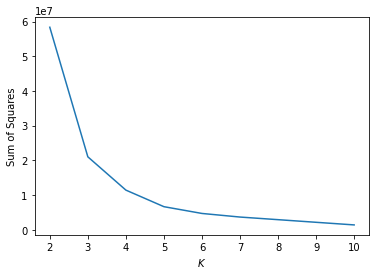

In [ ]:
ss = []
assignments = {}
X = df.to_numpy()
Krange = list(range(2, 11))
for K in Krange:
    model = sklearn.cluster.KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    #print(centers)
    #print(model.labels_)
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster
print(centers)
print(model.labels_)
plt.plot(Krange, ss)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")

4


([<matplotlib.axis.XTick at 0x7fa07c02af50>,
 <a list of 4 Text major ticklabel objects>)

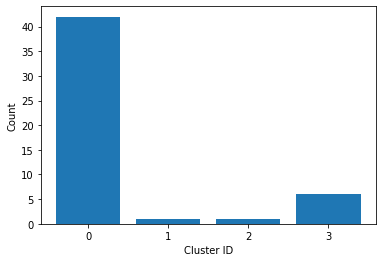

In [ ]:
best_K = 4
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))
plt.bar(range(best_K), counts, align='center')
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(best_K))

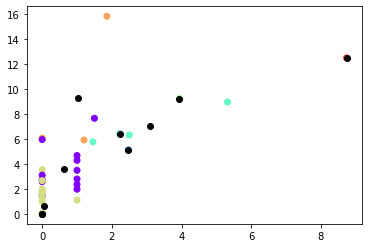

In [ ]:
plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')
plt.scatter(centers[:,0] ,centers[:,1], color='black')

Hierarchical Clustering

In [ ]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,age_mean3_0 - 17 years,age_mean3_18 to 49 years,age_mean3_50 to 64 years,age_mean3_65+ years,age_max3_0 - 17 years,age_max3_18 to 49 years,age_max3_50 to 64 years,age_max3_65+ years,age_mean6_0 - 17 years,age_mean6_18 to 49 years,age_mean6_50 to 64 years,age_mean6_65+ years,age_max6_0 - 17 years,age_max6_18 to 49 years,age_max6_50 to 64 years,age_max6_65+ years,age_mean9_0 - 17 years,age_mean9_18 to 49 years,age_mean9_50 to 64 years,age_mean9_65+ years,age_max9_0 - 17 years,age_max9_18 to 49 years,age_max9_50 to 64 years,age_max9_65+ years,age_mean12_0 - 17 years,age_mean12_18 to 49 years,age_mean12_50 to 64 years,age_mean12_65+ years,age_max12_0 - 17 years,age_max12_18 to 49 years,age_max12_50 to 64 years,age_max12_65+ years,mean3_Female,mean3_Male,max3_Female,max3_Male,mean6_Female,mean6_Male,max6_Female,max6_Male,...,mean6_Black,mean6_Multiple/Other,mean6_Native Hawaiian/Other Pacific Islander,mean6_Unknown,mean6_White,max6_American Indian/Alaska Native,max6_Asian,max6_Black,max6_Multiple/Other,max6_Native Hawaiian/Other Pacific Islander,max6_Unknown,max6_White,mean9_American Indian/Alaska Native,mean9_Asian,mean9_Black,mean9_Multiple/Other,mean9_Native Hawaiian/Other Pacific Islander,mean9_Unknown,mean9_White,max9_American Indian/Alaska Native,max9_Asian,max9_Black,max9_Multiple/Other,max9_Native Hawaiian/Other Pacific Islander,max9_Unknown,max9_White,mean12_American Indian/Alaska Native,mean12_Asian,mean12_Black,mean12_Multiple/Other,mean12_Native Hawaiian/Other Pacific Islander,mean12_Unknown,mean12_White,max12_American Indian/Alaska Native,max12_Asian,max12_Black,max12_Multiple/Other,max12_Native Hawaiian/Other Pacific Islander,max12_Unknown,max12_White
0,0.0,0.002354,0.000000,0.0,0.0,0.004855,0.000000,0.0,0.000000,0.003514,0.000000,0.000000,0.000000,0.012946,0.000000,0.000000,0.001618,0.018632,0.002697,0.001618,0.001618,0.401332,0.003237,0.001618,0.001618,0.017917,0.002081,0.001618,0.001618,0.401332,0.003237,0.001618,0.002354,0.000000,0.004855,0.000000,0.003514,0.000000,0.012946,0.000000,...,0.003384,0.004855,0.0,0.002427,0.003833,0.0,0.001618,0.008091,0.004855,0.0,0.003237,0.012946,0.000000,0.006966,0.011882,0.005988,0.0,0.010156,0.032105,0.000000,0.043693,0.092242,0.021038,0.0,0.059876,0.401332,0.000000,0.005799,0.011328,0.005454,0.0,0.008745,0.031334,0.000000,0.043693,0.092242,0.021038,0.0,0.059876,0.401332
1,0.0,0.006246,0.000000,0.0,0.0,0.041104,0.000000,0.0,0.002418,0.006128,0.006448,0.015759,0.002418,0.053194,0.031433,0.166835,0.005547,0.008104,0.007571,0.023308,0.024179,0.261133,0.176507,0.251462,0.005527,0.010260,0.008417,0.018697,0.038686,0.263551,0.212775,0.251462,0.004715,0.013903,0.033851,0.041104,0.011032,0.012038,0.130567,0.166835,...,0.012313,0.010760,0.0,0.003454,0.011848,0.0,0.058030,0.120895,0.043522,0.0,0.009672,0.166835,0.000000,0.013235,0.012430,0.012746,0.0,0.004241,0.018610,0.000000,0.106388,0.186178,0.125731,0.0,0.016925,0.261133,0.000000,0.011893,0.011013,0.009940,0.0,0.004448,0.016413,0.000000,0.106388,0.186178,0.125731,0.0,0.031433,0.263551
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039591,0.000000,0.000000,0.000000,0.376363,0.000000,0.000000,0.000000,0.040521,0.000000,0.000000,0.000000,0.376363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.021085,0.000000,0.000000,0.0,0.007380,0.047684,0.000000,0.066417,0.000000,0.000000,0.0,0.007380,0.376363,0.000000,0.020436,0.000000,0.000000,0.0,0.007380,0.047698,0.000000,0.066417,0.000000,0.000000,0.0,0.007380,0.376363
3,0.0,0.037193,0.000000,0.0,0.0,0.037193,0.000000,0.0,0.037193,0.041326,0.044632,0.000000,0.037193,0.074386,0.074386,0.000000,0.037193,0.047820,0.048351,0.053724,0.037193,0.148773,0.111580,0.111580,0.042915,0.063124,0.048816,0.052070,0.074386,0.446319,0.111580,0.111580,0.037193,0.000000,0.037193,

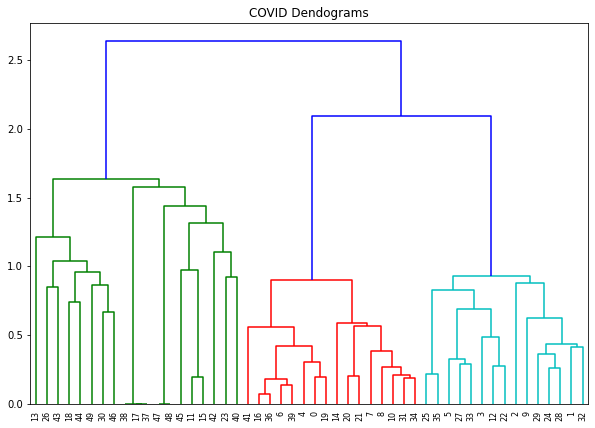

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("COVID Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1])

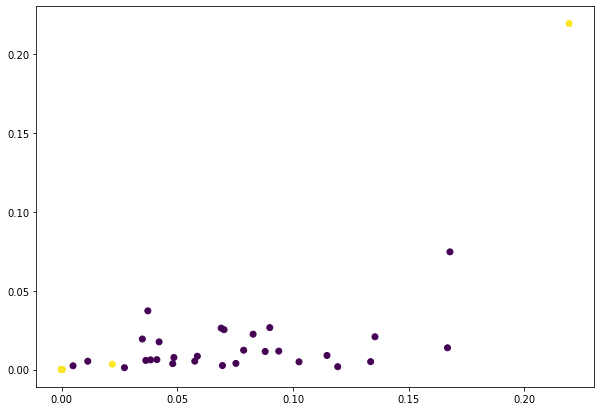

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['age_max3_18 to 49 years'], data_scaled['age_mean3_18 to 49 years'], c=cluster.labels_) 